<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Начало,-исследование-данных" data-toc-modified-id="Начало,-исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Начало, исследование данных</a></span></li><li><span><a href="#Расчёт-метрик-эффективности-рассылки" data-toc-modified-id="Расчёт-метрик-эффективности-рассылки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчёт метрик эффективности рассылки</a></span></li><li><span><a href="#Определение-лучшей-темы-и-лучшего-дня-недели-для-почтовой-рассылки-по-метрикам" data-toc-modified-id="Определение-лучшей-темы-и-лучшего-дня-недели-для-почтовой-рассылки-по-метрикам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение лучшей темы и лучшего дня недели для почтовой рассылки по метрикам</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Начало, исследование данных
Импорты:

In [1]:
import pandas as pd

Открытие датасета:

In [2]:
df = pd.read_excel('Data для тестового.xlsx', sheet_name='Data')

Сначала - небольшая проверка данных (как они выглядят, нет ли пропущенных значений, каковы типы значений в ячейках, сколько всего столбцов и строк).

In [3]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,...,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,03-среда,19:24:00,...,741749.55,148349.910,17801.98920,39039.45,7417.4955,Метка 1,16377.830064,6336.582452,6209.850803,5154.176166
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,05-пятница,12:02:00,...,683401.50,123012.270,11071.10430,35968.50,6834.0150,Метка 10,10296.126999,3558.341491,3095.757097,2538.520820
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,01-понедельник,16:26:00,...,1141344.25,182615.080,15339.66672,60070.75,11413.4425,Метка 100,13959.096715,3369.725947,2864.267055,2262.770973
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,02-вторник,16:26:00,...,1324135.65,264827.130,10328.25807,69691.35,13241.3565,Метка 101,8985.584521,5116.391826,4277.303567,3207.977675
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,03-среда,16:26:00,...,1212979.95,218336.391,15720.22015,63841.05,12129.7995,Метка 102,10846.951905,2816.953410,2287.366169,1669.777303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Название рассылки       218 non-null    object        
 1   Название кампании       218 non-null    object        
 2   Направление             218 non-null    object        
 3   Месяц                   218 non-null    object        
 4   Дата                    218 non-null    datetime64[ns]
 5   Год                     218 non-null    int64         
 6   Номер недели            218 non-null    int64         
 7   День недели             218 non-null    int64         
 8   День недели.1           218 non-null    object        
 9   Время                   218 non-null    object        
 10  Веб-версия              218 non-null    object        
 11  Тема письма             218 non-null    object        
 12  Сегмент                 218 non-null    object    

Пробный график с динамикой от даты - это поможет выявить некоторые закономерности (например, здесь будет видно, когда случилось больше всего отписок).

<Axes: xlabel='Дата'>

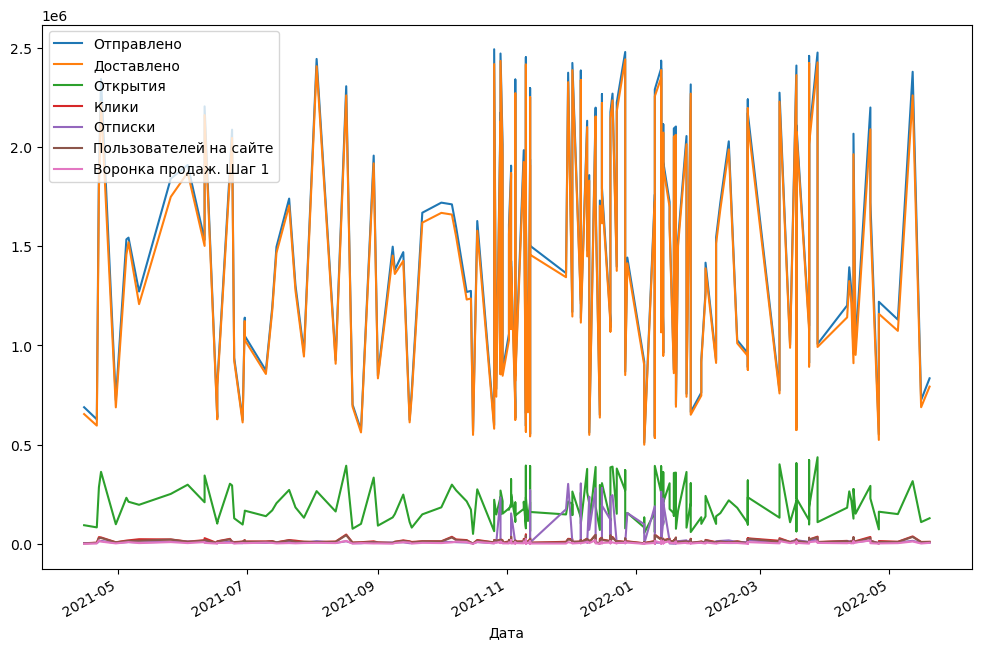

In [5]:
cols = ['Дата', 'Отправлено', 'Доставлено', 'Открытия', 'Клики', 'Отписки', 'Пользователей на сайте', 
        'Воронка продаж. Шаг 1']
df[cols].plot(x='Дата', figsize=(12,8))

## Расчёт метрик эффективности рассылки
Здесь мы рассчитаем основные метрики:
* Delivery rate = Доставлено / Отправлено
* Open rate = Открытия / Доставлено
* Click to Open rate = Клики / Открытия
* Unsubscribe rate = Отписки / Доставлено

In [6]:
df['Delivery rate, %'] = df['Доставлено'] / df['Отправлено'] * 100
df['Open rate, %'] = df['Открытия'] / df['Доставлено'] * 100
df['Click to Open rate, %'] = df['Клики'] / df['Открытия'] * 100
df['Unsubscribe rate, %'] = df['Отписки'] / df['Доставлено'] * 100

In [7]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,...,Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3,"Delivery rate, %","Open rate, %","Click to Open rate, %","Unsubscribe rate, %"
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,03-среда,19:24:00,...,7417.4955,Метка 1,16377.830064,6336.582452,6209.850803,5154.176166,95.0,20.0,12.0,1.0
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,05-пятница,12:02:00,...,6834.0150,Метка 10,10296.126999,3558.341491,3095.757097,2538.520820,95.0,18.0,9.0,1.0
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,01-понедельник,16:26:00,...,11413.4425,Метка 100,13959.096715,3369.725947,2864.267055,2262.770973,95.0,16.0,8.4,1.0
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,02-вторник,16:26:00,...,13241.3565,Метка 101,8985.584521,5116.391826,4277.303567,3207.977675,95.0,20.0,3.9,1.0
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,03-среда,16:26:00,...,12129.7995,Метка 102,10846.951905,2816.953410,2287.366169,1669.777303,95.0,18.0,7.2,1.0


## Определение лучшей темы и лучшего дня недели для почтовой рассылки по метрикам
По превью метрики посчитаны и работают корректно, теперь определим лучшую тему рассылок. Сначала посмотрим список всех тем:

In [8]:
# df['Тема письма'].unique() # почему-то не работает, вероятны проблемы с названием
df.columns

Index(['Название рассылки', 'Название кампании', 'Направление', 'Месяц',
       'Дата', 'Год', 'Номер недели', 'День недели', 'День недели.1', 'Время',
       'Веб-версия', 'Тема письма ', 'Сегмент ', 'Отправлено', 'Доставлено',
       'Открытия', 'Клики', 'Баунсы (Все ошибки)', 'Отписки', 'UTM Метка',
       'Пользователей на сайте', 'Воронка продаж. Шаг 1',
       'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3', 'Delivery rate, %',
       'Open rate, %', 'Click to Open rate, %', 'Unsubscribe rate, %'],
      dtype='object')

In [9]:
# убираем пробел из названия
df.rename(columns={'Тема письма ': 'Тема письма'}, inplace=True)

#выводим уникальные названия тем, считаем общее количество
print(df['Тема письма'].unique())
df['Тема письма'].count()

['Тема письма 1' 'Тема письма 10' 'Тема письма 100' 'Тема письма 101'
 'Тема письма 102' 'Тема письма 103' 'Тема письма 104' 'Тема письма 105'
 'Тема письма 106' 'Тема письма 107' 'Тема письма 108' 'Тема письма 109'
 'Тема письма 11' 'Тема письма 110' 'Тема письма 111' 'Тема письма 112'
 'Тема письма 113' 'Тема письма 114' 'Тема письма 115' 'Тема письма 116'
 'Тема письма 117' 'Тема письма 118' 'Тема письма 119' 'Тема письма 12'
 'Тема письма 120' 'Тема письма 121' 'Тема письма 122' 'Тема письма 123'
 'Тема письма 124' 'Тема письма 125' 'Тема письма 126' 'Тема письма 127'
 'Тема письма 128' 'Тема письма 129' 'Тема письма 13' 'Тема письма 130'
 'Тема письма 131' 'Тема письма 132' 'Тема письма 133' 'Тема письма 134'
 'Тема письма 135' 'Тема письма 136' 'Тема письма 137' 'Тема письма 138'
 'Тема письма 139' 'Тема письма 14' 'Тема письма 140' 'Тема письма 141'
 'Тема письма 142' 'Тема письма 143' 'Тема письма 144' 'Тема письма 145'
 'Тема письма 146' 'Тема письма 147' 'Тема письма 148' 'Те

218

Темы писем уникальны для каждой строки датафрейма, поэтому нет нужды группировать по ним. Вместо этого просто выбираем темы с лучшими метриками:

In [10]:
df_best = df[(df['Click to Open rate, %'] == df['Click to Open rate, %'].max()) |
                  (df['Open rate, %'] == df['Open rate, %'].max()) |
                 (df['Unsubscribe rate, %'] == df['Unsubscribe rate, %'].min())]

In [11]:
df_best[['Тема письма', 'Click to Open rate, %', 'Open rate, %', 'Unsubscribe rate, %']]

,Тема письма,"Click to Open rate, %","Open rate, %","Unsubscribe rate, %"
0,Тема письма 1,12.0,20.00,1.00
3,Тема письма 101,3.9,20.00,1.00
124,Тема письма 210,7.2,11.05,0.15
125,Тема письма 211,12.0,9.20,0.15
127,Тема письма 213,8.4,18.00,0.15
128,Тема письма 214,3.9,17.43,0.15
129,Тема письма 215,7.2,11.05,0.15
130,Тема письма 216,12.0,9.20,0.15
131,Тема письма 217,9.0,17.43,0.15
132,Тема письма 218,8.4,11.05,0.15


Мы получили небольшой датасет с "лучшими" темами по различным метрикам, где можем изучить их все вместе или по отдельности. Например, сортировать темы по выбранной метрике:

In [12]:
df_best.sort_values('Click to Open rate, %', axis=0, ascending=False)[['Тема письма', 'Click to Open rate, %']]

,Тема письма,"Click to Open rate, %"
180,Тема письма 65,12.0
0,Тема письма 1,12.0
125,Тема письма 211,12.0
130,Тема письма 216,12.0
131,Тема письма 217,9.0
127,Тема письма 213,8.4
132,Тема письма 218,8.4
129,Тема письма 215,7.2
134,Тема письма 23,7.2
124,Тема письма 210,7.2


Теперь выявляем лучший день недели для планирования рассылок, для чего возвращаемся к оригинальному датасету и смотрим, какие там встречаются дни недели:

In [13]:
df['День недели'].unique()

array([3, 5, 1, 2, 4, 6], dtype=int64)

In [14]:
df['День недели.1'].unique()

array(['03-среда', '05-пятница', '01-понедельник', '02-вторник',
       '04-четверг', '06-суббота'], dtype=object)

Столбец с указанием дня (а не только числового кода) более информативен и послужит группировочным. Отделяем его и столбцы метрик. Попробуем найти лучший день недели сравнением *средних значений* метрик, сгруппировав данные по дням недели:

In [15]:
df_best_weekday = df[['День недели.1', 'Click to Open rate, %', 'Open rate, %', 'Unsubscribe rate, %']]
df_best_weekday.groupby('День недели.1').mean()

,"Click to Open rate, %","Open rate, %","Unsubscribe rate, %"
День недели.1,,,
01-понедельник,8.144118,13.586765,4.137647
02-вторник,8.976000,13.488800,2.037200
03-среда,8.010000,14.326750,1.419250
04-четверг,7.905556,13.701667,1.819815
05-пятница,8.135000,13.656500,3.151167
06-суббота,6.840000,13.796000,0.554000


Из этого видно, что максимальный средний процент Click to Open достигается во вторник, а Open rate - в среду, при этом с малым значением Unsubscribe rate. Но из этого пока не следует, что именно вторник и среда - лучшие дни; среднее может быть необъективным, если в значениях есть сильные выбросы. Посмотрим распределение метрик на диаграмме размаха.

<Axes: >

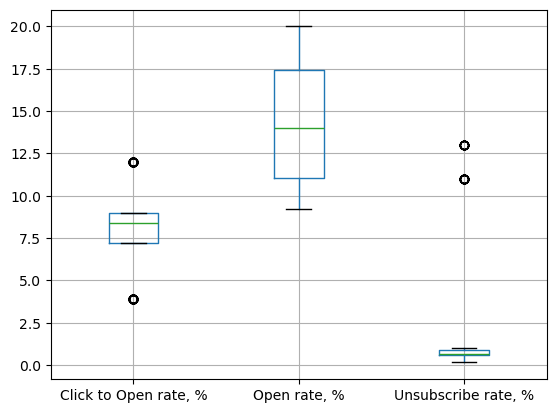

In [16]:
df_best_weekday.boxplot()

В Click to Open rate и Unsubscribe rate наблюдаются выбросы за пределами очень узкого диапазона значений, а значит, лучше будет использовать медиану.

In [17]:
df_best_weekday.groupby('День недели.1').median()

,"Click to Open rate, %","Open rate, %","Unsubscribe rate, %"
День недели.1,,,
01-понедельник,8.4,11.050,0.635
02-вторник,9.0,11.050,0.690
03-среда,8.4,14.410,0.630
04-четверг,8.4,14.000,0.690
05-пятница,8.4,12.515,0.660
06-суббота,8.4,14.410,0.570


Также проверим количество записей в датасете по каждому дню:

In [18]:
df_best_weekday.groupby('День недели.1').count()

,"Click to Open rate, %","Open rate, %","Unsubscribe rate, %"
День недели.1,,,
01-понедельник,34,34,34
02-вторник,25,25,25
03-среда,40,40,40
04-четверг,54,54,54
05-пятница,60,60,60
06-суббота,5,5,5


## Выводы
Видно, что по субботам записей о рассылках мало, в то время как в рабочую неделю их каждый день по несколько десятков. В субботу самый малый процент отписавшихся, но из-за небольшого количества отправленных писем в этот день мы не можем судить о его "выгодности" для целей рассылки достаточно объективно, поэтому рассматриваем рабочие дни. Самый высокий Open rate наблюдается в среду и четверг, максимальный Click to Open rate - во вторник.

Из этого можно сделать вывод, что лучшими днями для почтовой рассылки являются вторник-четверг (в зависимости от того, какая именно метрика нас интересует; если это Click to Open rate, то лучшим днём является вторник, если же Open rate, то среда и четверг), но не пятница, несмотря на то, что именно в этот день отправляется больше всего писем.